Project Name :- ANN Rgression (Single Layer) on Football club Ranking Data.*

In [2]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [3]:
# loading the data to a data frame
df = pd.read_csv("Soccer_Football Clubs Ranking.csv")

In [4]:
# head() prints first 5 rows of the dataframe
df.head

<bound method NDFrame.head of       ranking                club name                  country  point score  \
0          88                1. FC Köln                 Germany         1633   
1          74        1. FC Union Berlin                 Germany         1655   
2         780  12 de Octubre de Itaugua                Paraguay         1377   
3         268              1º de Agosto                  Angola         1513   
4        2525                1º de Maio                  Angola         1218   
...       ...                       ...                     ...          ...   
2807      316           Zrinjski Mostar  Bosnia and Herzegovina         1488   
2808     1387                     Zulia               Venezuela         1304   
2809     1187             Zulte Waregem                 Belgium         1326   
2810     2389                   Zumunta                   Niger         1231   
2811      325                    Zürich             Switzerland         1484   

      1 y

In [5]:
#getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2812 entries, 0 to 2811
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ranking                2812 non-null   int64 
 1   club name              2812 non-null   object
 2   country                2812 non-null   object
 3   point score            2812 non-null   int64 
 4   1 year change          2812 non-null   int64 
 5   previous point scored  2812 non-null   int64 
 6   symbol change          2812 non-null   object
dtypes: int64(4), object(3)
memory usage: 153.9+ KB


In [6]:
# statistical measures about the data
df.describe

<bound method NDFrame.describe of       ranking                club name                  country  point score  \
0          88                1. FC Köln                 Germany         1633   
1          74        1. FC Union Berlin                 Germany         1655   
2         780  12 de Octubre de Itaugua                Paraguay         1377   
3         268              1º de Agosto                  Angola         1513   
4        2525                1º de Maio                  Angola         1218   
...       ...                       ...                     ...          ...   
2807      316           Zrinjski Mostar  Bosnia and Herzegovina         1488   
2808     1387                     Zulia               Venezuela         1304   
2809     1187             Zulte Waregem                 Belgium         1326   
2810     2389                   Zumunta                   Niger         1231   
2811      325                    Zürich             Switzerland         1484   

     

<Axes: >

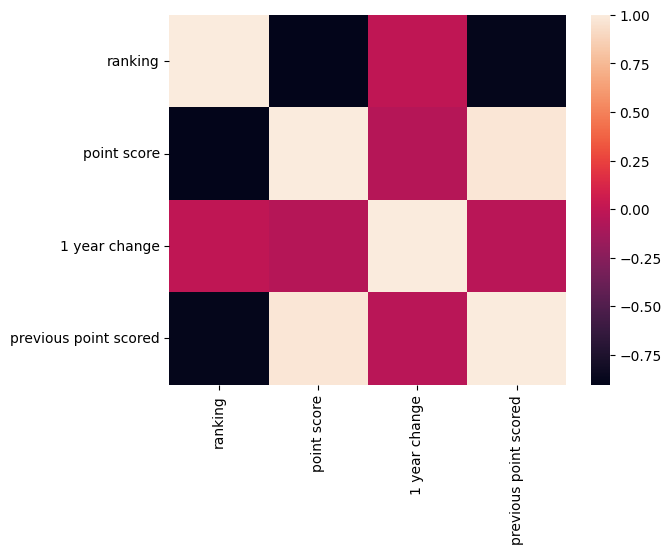

In [8]:
#using heatmap finding corelation 
sns.heatmap(df.corr())

In [9]:
# checking for missing values
df.isnull().sum()

ranking                  0
club name                0
country                  0
point score              0
1 year change            0
previous point scored    0
symbol change            0
dtype: int64

In [10]:
#seprating features and targets
x=df.iloc[:,0:-2].values
y=df.iloc[:,-2].values

In [12]:
#print x
x

array([[88, '1. FC Köln', 'Germany', 1633, 105],
       [74, '1. FC Union Berlin', 'Germany', 1655, 5],
       [780, '12 de Octubre de Itaugua', 'Paraguay', 1377, 70],
       ...,
       [1187, 'Zulte Waregem', 'Belgium', 1326, 423],
       [2389, 'Zumunta', 'Niger', 1231, 30],
       [325, 'Zürich', 'Switzerland', 1484, 424]], dtype=object)

In [13]:
#prnt y
y

array([1545, 1654, 1388, ..., 1377, 1231, 1381])

In [14]:
#import LabelEncoder to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()
x[:,1]=le.fit_transform(x[:,1])

In [16]:
x

array([[88, 0, 'Germany', 1633, 105],
       [74, 1, 'Germany', 1655, 5],
       [780, 2, 'Paraguay', 1377, 70],
       ...,
       [1187, 2719, 'Belgium', 1326, 423],
       [2389, 2720, 'Niger', 1231, 30],
       [325, 2721, 'Switzerland', 1484, 424]], dtype=object)

In [17]:
le1=LabelEncoder()
x[:,2]=le1.fit_transform(x[:,2])
x

array([[88, 0, 40, 1633, 105],
       [74, 1, 40, 1655, 5],
       [780, 2, 89, 1377, 70],
       ...,
       [1187, 2719, 9, 1326, 423],
       [2389, 2720, 83, 1231, 30],
       [325, 2721, 111, 1484, 424]], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2812 entries, 0 to 2811
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ranking                2812 non-null   int64 
 1   club name              2812 non-null   object
 2   country                2812 non-null   object
 3   point score            2812 non-null   int64 
 4   1 year change          2812 non-null   int64 
 5   previous point scored  2812 non-null   int64 
 6   symbol change          2812 non-null   object
dtypes: int64(4), object(3)
memory usage: 153.9+ KB


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#Splitting the data into training data & Testing data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
#Standard scale data before training model
from sklearn.preprocessing import StandardScaler

In [22]:
sc=StandardScaler()

In [23]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [24]:
#step1: initialize model
ann=Sequential()

In [25]:
#step2 add layers to model
ann.add(Dense(units=4,activation="relu")) # i/p layer
ann.add(Dense(units=1)) #o/p layer #no activation function in o/p layer in regression


In [32]:
#step 3:compile model/establishing connection between layers
ann.compile(optimizer="adam",loss="mse") #no metric parameter in regression


In [33]:
#step 4:train model
ann.fit(xtrain,ytrain,batch_size=20,epochs=100)

Epoch 1/100
99/99 [==============================] - 1s 2ms/step - loss: 791269.5625
Epoch 2/100
99/99 [==============================] - 0s 1ms/step - loss: 777142.0000
Epoch 3/100
99/99 [==============================] - 0s 1ms/step - loss: 763134.8750
Epoch 4/100
99/99 [==============================] - 0s 1ms/step - loss: 749206.3750
Epoch 5/100
99/99 [==============================] - 0s 2ms/step - loss: 735383.7500
Epoch 6/100
99/99 [==============================] - 0s 2ms/step - loss: 721641.7500
Epoch 7/100
99/99 [==============================] - 0s 1ms/step - loss: 708010.8750
Epoch 8/100
99/99 [==============================] - 0s 2ms/step - loss: 694506.2500
Epoch 9/100
99/99 [==============================] - 0s 2ms/step - loss: 681090.5000
Epoch 10/100
99/99 [==============================] - 0s 2ms/step - loss: 667771.3750
Epoch 11/100
99/99 [==============================] - 0s 2ms/step - loss: 654574.4375
Epoch 12/100
99/99 [==============================] - 0s 2ms/st

In [38]:
#step5 : prediction
ypred=ann.predict(xtest)

27/27 [==============================] - 0s 1ms/step


In [36]:
print(f"MSE:{mean_squared_error(ytest,ypred)}")

MSE:53932.67860748682


In [37]:
print(f"RMSE:{np.sqrt(mean_squared_error(ytest,ypred))}")

RMSE:232.23410302426907
